In [56]:
import pandas as pd
def load_predictions(path):

    df = pd.read_parquet(path+'predictions.parquet')
    
    
    #Calculate some extra columns
    df['model_predicion_bias'] = df.MODIS_LST - df.predictions
    df['model_predicion_error'] = abs(df.MODIS_LST - df.predictions)
        
    df['ERA_predicion_bias'] = df.MODIS_LST - df.skt_unnormalised
    df['ERA_predicion_error'] = abs(df.MODIS_LST - df.skt_unnormalised)


    print ('----------------------------------MODEL-------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['model_predicion_bias'].mean(), df['model_predicion_bias'].median(),df['model_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['model_predicion_error'].mean(), df['model_predicion_error'].median(),df['model_predicion_error'].std())
    print ('------------------------------------ERA---------------------------------------------------')
    print("Mean/Median/Std prediction bias:", df['ERA_predicion_bias'].mean(), df['ERA_predicion_bias'].median(),df['ERA_predicion_bias'].std())
    print("Mean/Median/Std prediction error:", df['ERA_predicion_error'].mean(), df['ERA_predicion_error'].median(),df['ERA_predicion_error'].std())
    print ('-------------------------------------------------------------------------------------------')

    
    return df

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


from matplotlib import ticker



        
        
        
def global_plot(df,z,projection,vmin,vmax,cmap,absolute_values,logscale,title,markersize,savefig,cbar_label):
    
    
        
       # ccrs.Robinson()
        
    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=projection)
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    try:
        x = df.longitude
        y = df.latitude
    except: #different sources call lat/lon different things
        x = df.x
        y = df.y

    z1 = df[z]
    if absolute_values:
        z1 = abs(z1)
        if vmin < 0:
            vmin = 0 # dont need negative vmins if plotting absolute values
    
    
    #Normalize, colorbars
    if vmin is None:
        vmin = min(z1)
    if vmax is None:
        vmax = max(z1)
        

     #Cmaps, normalisations
    if logscale:
        norm = mc.LogNorm(vmin=vmin, vmax=vmax)
        z1 = abs(z1)
    else:
        norm = mc.Normalize(vmin=vmin, vmax=vmax)

    
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
    
    
    
    

    
    #Scatter points
    sc = ax.scatter(x,y,transform=ccrs.PlateCarree(), #Always PlateCarree
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    

#     #Set num ticks on coloarbar
#     cb = plt.colorbar()
    tick_locator = ticker.LinearLocator(5)
    cb1.locator = tick_locator
    cb1.update_ticks()
    
    
    
    
    
    
    
    
    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')

    #ax.plot([-180,180],[0,0],transform=ccrs.PlateCarree(),c='0.5', linestyle='--') #Plot the equator


    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(cbar_label,fontsize=34)

    ax.set_title(title)    
    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    #ax.set_xlim(-180,180)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)   
        
        
        
        
            

In [2]:
path_to_file = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/extra_manuscript_files/aquaDay_averageObsTime_31km_2019.tiff'

In [3]:
import xarray as xr
ds = xr.open_rasterio(path_to_file)

/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  


In [11]:
df = ds.to_dataframe(name='obs_time').reset_index().dropna()

In [16]:
df

band       y        x   obs_time
115268     1  69.875 -162.875  12.025861
115269     1  69.875 -162.625  12.073346
115270     1  69.875 -162.375  12.054930
115271     1  69.875 -162.125  12.094567
115272     1  69.875 -161.875  12.086988
...      ...     ...      ...        ...
921517     1 -69.875  159.375  15.311317
921518     1 -69.875  159.625  15.312102
921519     1 -69.875  159.875  15.277031
921520     1 -69.875  160.125  15.212970
921521     1 -69.875  160.375  15.226615

[244657 rows x 4 columns]

In [14]:
df.obs_time.min()

11.177778

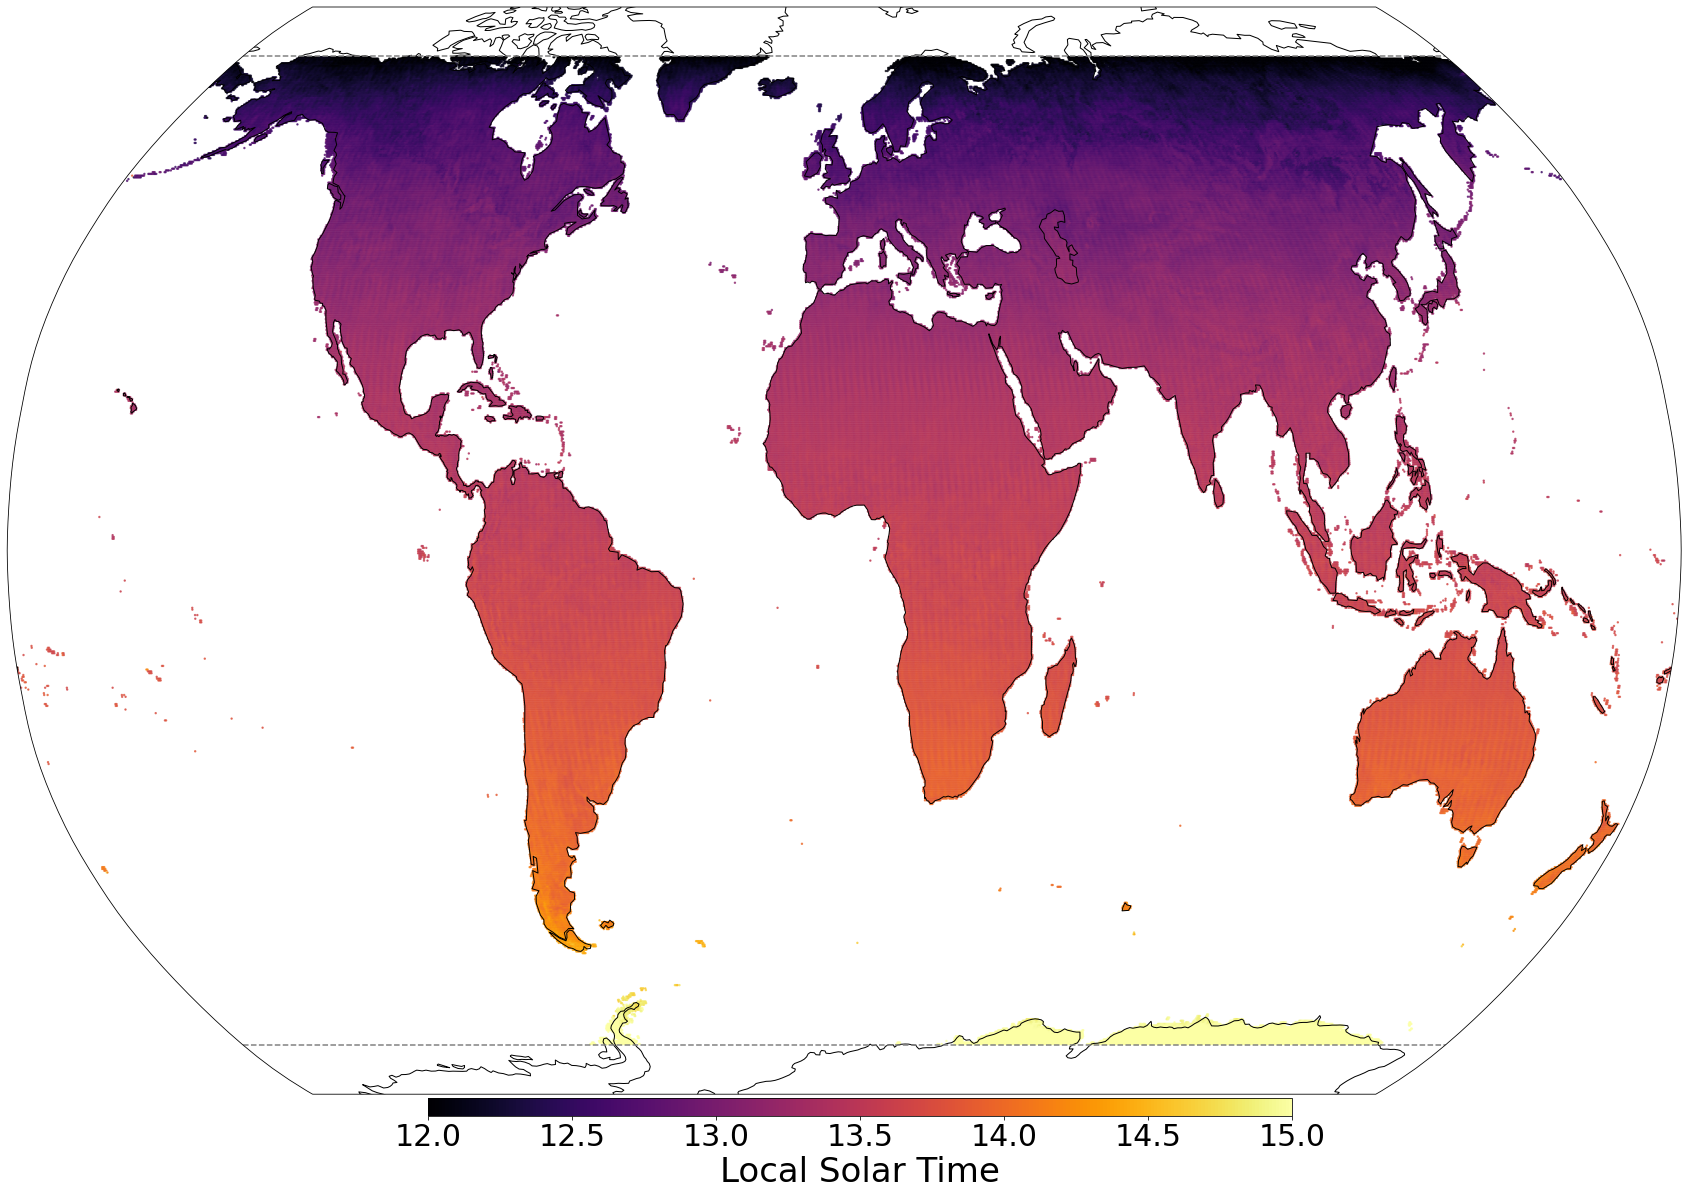

In [31]:
global_plot(df,
            'obs_time',
            projection=ccrs.Robinson(), #ccrs.PlateCarree() , ccrs.Robinson()
            vmin=12,vmax=15,
            cmap=plt.cm.inferno,
            absolute_values = True,
            logscale=False,
            title=None,
            markersize=2,
            savefig='figs/MODIS_local_solar_time.png',
            cbar_label='Local Solar Time [hrs]')


# Plot differences

In [32]:
path_to_file = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/extra_manuscript_files/aquaDay_averageDifference1330MinusObsTime_31km_2019.tiff'

In [33]:
ds = xr.open_rasterio(path_to_file)
df_differences = ds.to_dataframe(name='difference').reset_index().dropna()

/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


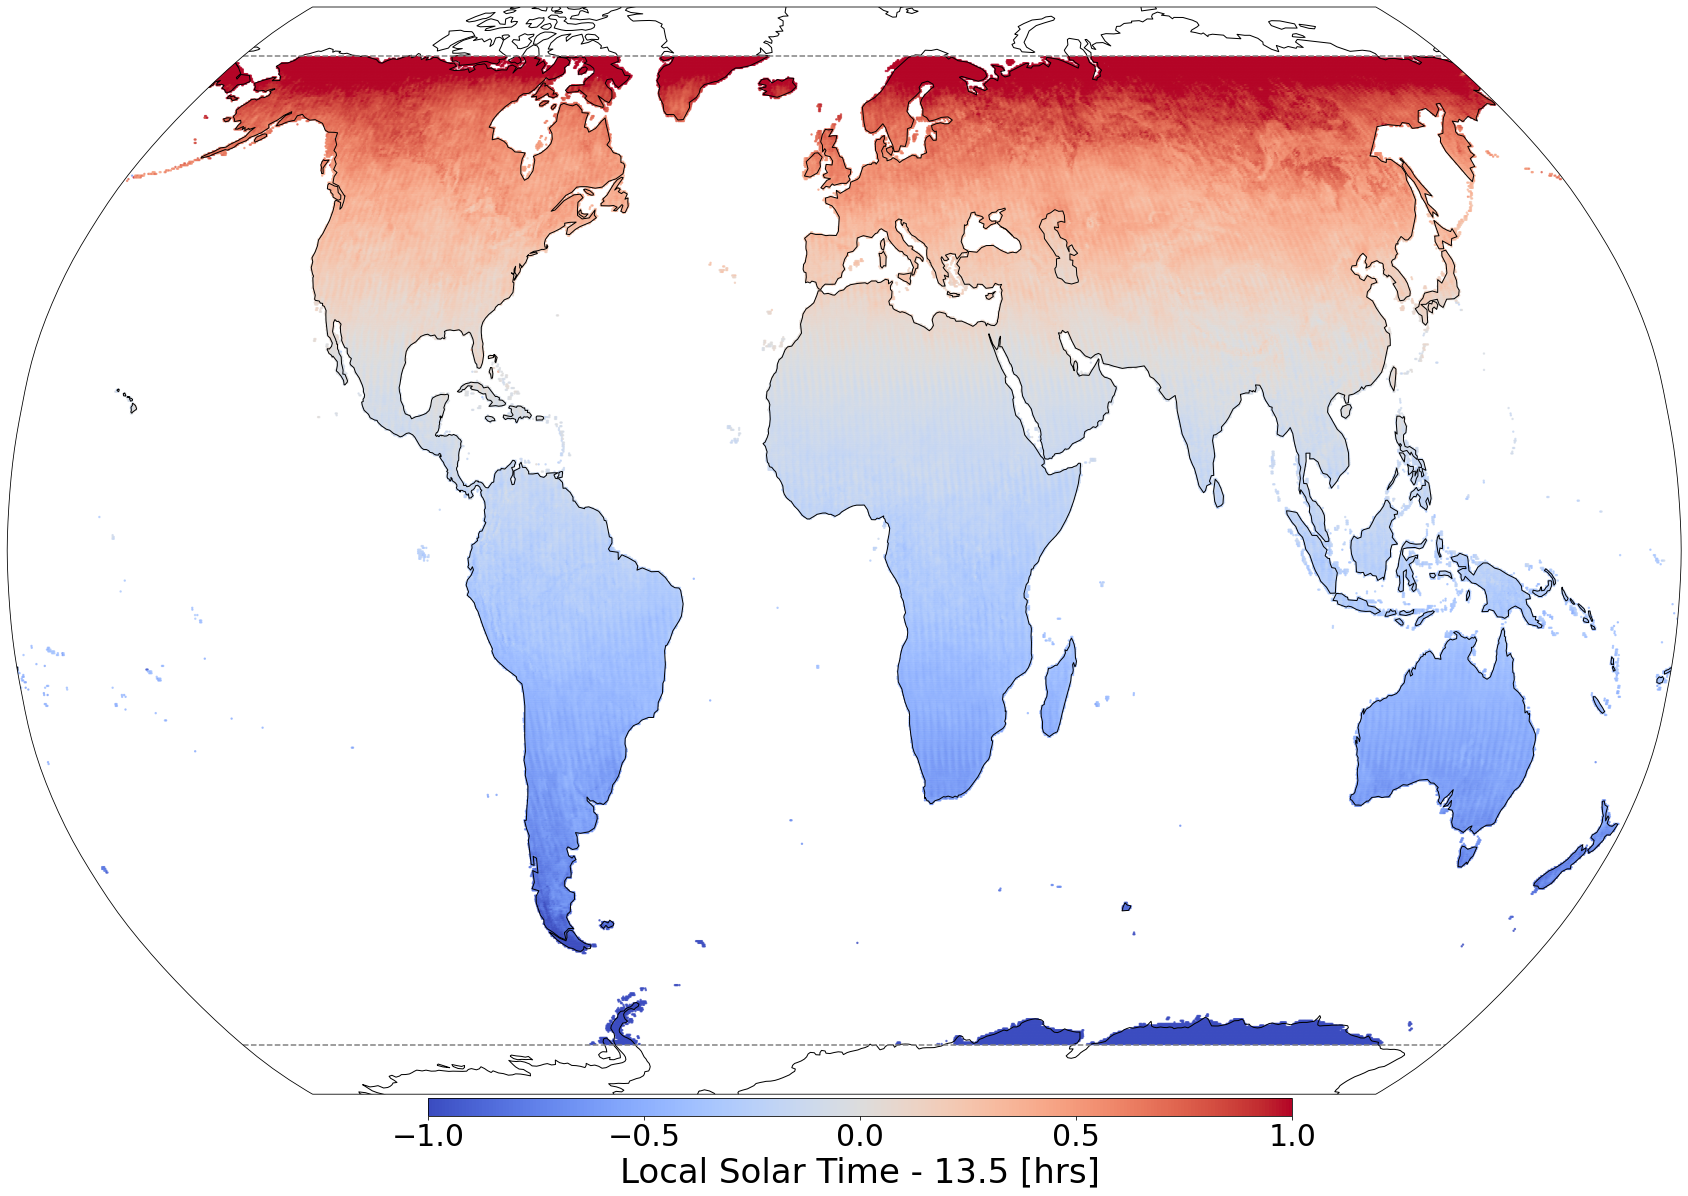

In [58]:
global_plot(df_differences,
            'difference',
            projection=ccrs.Robinson(), #ccrs.PlateCarree() , ccrs.Robinson()
            vmin=-1,vmax=1,
            cmap=plt.cm.coolwarm,
            absolute_values = False,
            logscale=False,
            title=None,
            markersize=2,
            savefig='figs/MODIS_local_solar_time_diff.png',
            cbar_label='Local Solar Time - 13.5 [hrs]')


# Plot errrors

In [59]:
path_to_file = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/extra_manuscript_files/aquaDay_averageError_basedNrObs_31km_2019.tiff'

In [60]:
ds = xr.open_rasterio(path_to_file)
df_error = ds.to_dataframe(name='error').reset_index().dropna()

/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  """Entry point for launching an IPython kernel.


In [61]:
df_error

band       y        x     error
115267     1  69.875 -163.125  4.933613
115268     1  69.875 -162.875  2.214474
115269     1  69.875 -162.625  1.696324
115270     1  69.875 -162.375  1.329525
115271     1  69.875 -162.125  1.268868
...      ...     ...      ...       ...
921517     1 -69.875  159.375  0.976627
921518     1 -69.875  159.625  1.022826
921519     1 -69.875  159.875  1.444923
921520     1 -69.875  160.125  1.320231
921521     1 -69.875  160.375  2.538152

[247496 rows x 4 columns]

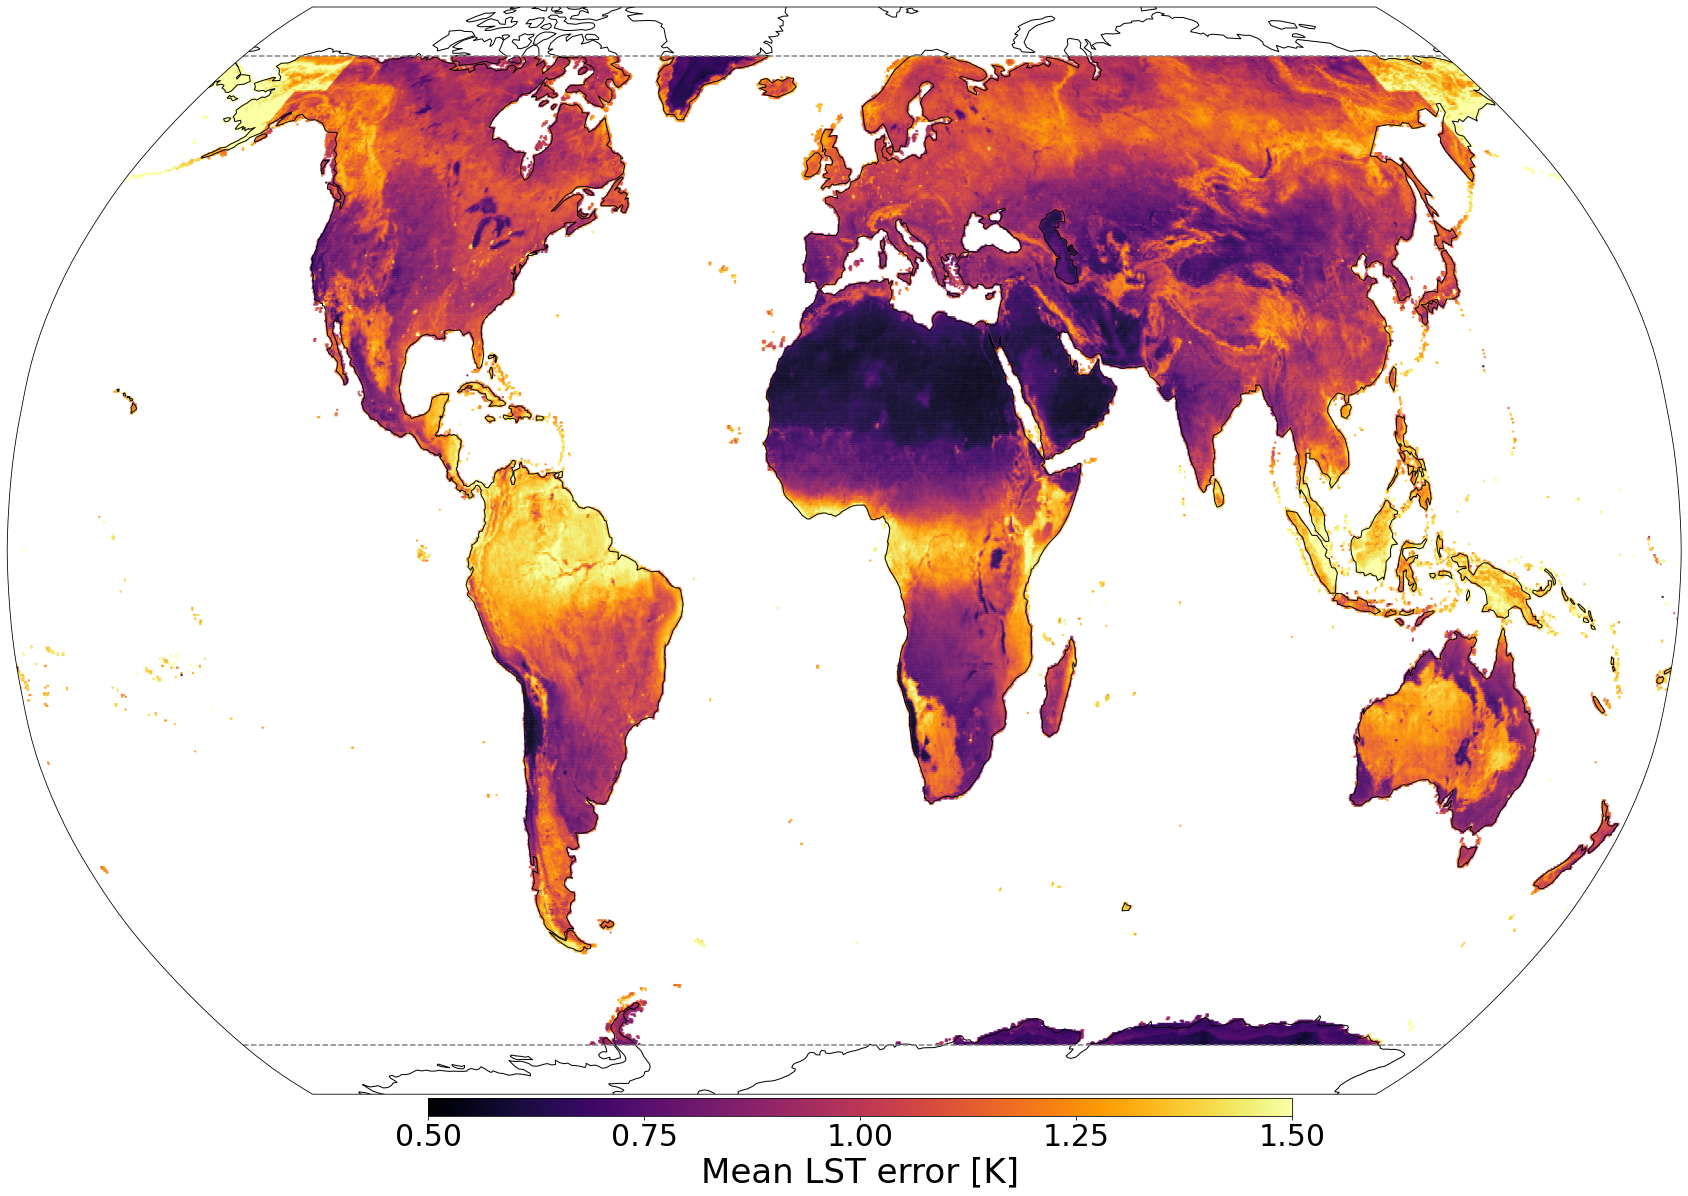

In [66]:
global_plot(df_error,
            'error',
            projection=ccrs.Robinson(), #ccrs.PlateCarree() , ccrs.Robinson()
            vmin=0.5,vmax=1.5,
            cmap=plt.cm.inferno,
            absolute_values = False,
            logscale=False,
            title=None,
            markersize=2,
            savefig='figs/MODIS_obs_error.png',
            cbar_label='Mean LST error [K]')
